## Ridge Regression

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

### Numerical Data

In [45]:
tic = time.time()

In [138]:
flights = pd.read_csv('data/flights_clean.csv')
flights

,airline,day,day_of_week,departure_delay,destination_airport,destination_latitude,destination_longitude,distance,month,origin_airport,...,scheduled_arrival,scheduled_departure,scheduled_time,state_destination,state_origin,taxi_in,taxi_out,day_of_year,origin_temperature,destination_temperature
0,AS,1,4,-11.0,SEA,47.44898,-122.30931,1448,1,ANC,...,270,5,205.0,WA,AK,4.0,21.0,1,35.2,32.9
1,AS,1,4,-4.0,SEA,47.44898,-122.30931,1448,1,ANC,...,309,45,204.0,WA,AK,4.0,17.0,1,35.2,32.9
2,DL,1,4,-14.0,SEA,47.44898,-122.30931,1448,1,ANC,...,315,45,210.0,WA,AK,4.0,25.0,1,35.2,32.9
3,AS,1,4,-15.0,SEA,47.44898,-122.30931,1448,1,ANC,...,393,115,218.0,WA,AK,11.0,17.0,1,35.2,32.9
4,AS,1,4,-11.0,SEA,47.44898,-122.30931,1448,1,ANC,...,400,140,200.0,WA,AK,8.0,15.0,1,35.2,32.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4031914,EV,27,5,77.0,ROA,37.32547,-79.97543,357,11,ATL,...,648,565,83.0,VA,GA,3.0,9.0,331,59.7,49.4
4031915,EV,27,5,-6.0,ROA,37.32547,-79.97543,357,11,ATL,...,985,902,83.0,VA,GA,5.0,21.0,331,59.7,49.4
4031916,DL,27,5,-1.0,ROA,37.32547,-79.97543,357,11,ATL,...,1162,1079,83.0,VA,GA,6.0,22.0,331,59.7,49.4
4031917,EV,19,6,88.0,ABE,40.65236,-75.44040,692,12,ATL,...,934,821,113.0,PA,GA,3.0,22.0,353,37.8,35.6


In [47]:
flights.iloc[0]

airline                           AS
day                                1
day_of_week                        4
departure_delay                -11.0
destination_airport              SEA
destination_latitude        47.44898
destination_longitude     -122.30931
distance                        1448
month                              1
origin_airport                   ANC
origin_latitude             61.17432
origin_longitude          -149.99619
scheduled_arrival                270
scheduled_departure                5
scheduled_time                 205.0
state_destination                 WA
state_origin                      AK
taxi_in                          4.0
taxi_out                        21.0
day_of_year                        1
origin_temperature              35.2
destination_temperature         32.9
Name: 0, dtype: object

In [48]:
pre_y = flights.departure_delay

In [49]:
pre_X = flights.drop(columns=['departure_delay', 'airline', 'destination_airport',
                              'origin_airport', 'state_destination', 'state_origin'])

In [50]:
X, X_test, y, y_test = train_test_split(pre_X, pre_y)

In [51]:
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

In [52]:
alphas = 10**np.linspace(10,-2,200)*0.5

In [53]:
# Find ridge coeffs for all lambda values
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(Xstd, y)
    coefs.append(ridge.coef_)

Text(0, 0.5, 'Standardized coefficient')

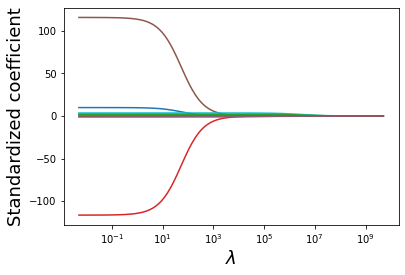

In [54]:
# Visualize shrinking regression coefficients with lambda increase
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')

In [55]:
# Cross validation to find optimal lambda
alphas = 10**np.linspace(2,-2,200)*0.5
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(Xstd, y)

#Optimal value of the tuning parameter - lambda
ridgecv.alpha_

0.05058189898831035

Text(0, 0.5, 'Cross-validation error')

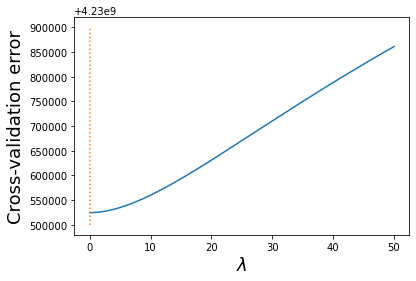

In [81]:
# Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(ridgecv.alphas,ridgecv.cv_values_.sum(axis=0))
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[4e9+2e8+3e7+5e5,4e9+2e8+3e7+9e5],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

Text(0, 0.5, 'Standardized coefficient')

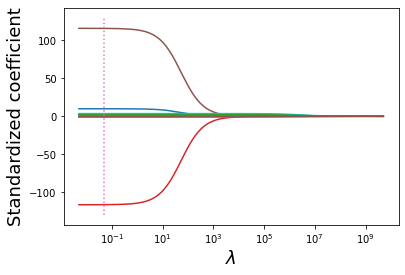

In [57]:
# Visualize with the optimal lambda
alphas = 10**np.linspace(10,-2,200)*0.5
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[-130,130],':')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')

In [58]:
Xtest_std = scaler.transform(X_test)

In [59]:
#Using the developed ridge regression model to predict on test data
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(Xstd, y)
pred=ridge.predict(Xtest_std)

In [60]:
#RMSE on test data
np.sqrt(((pred-y_test)**2).mean())

37.421598050228624

Numerical Ridge RMSE = 37.422

In [61]:
y_test.std()

37.786564055795324

In [62]:
#Checking the coefficients of the ridge regression model
ridge.coef_

array([ 9.87724077e+00, -6.94792171e-01, -2.16567809e-01,  4.56502684e-01,
       -9.51693615e-01,  1.15586349e+02, -6.82920264e-01,  1.61928135e-01,
        1.38702225e+00,  3.52926874e+00,  1.61430974e+00,  5.42189648e-01,
        2.03906877e+00, -1.16264269e+02, -8.47861384e-01, -9.08208039e-02])

In [63]:
#R-squared on train data for the ridge regression model
r2_score(ridge.predict(Xstd),y)

-48.05758260608127

In [64]:
#R-squared on test data for the ridge regression model
r2_score(pred,y_test)

-48.121547722188076

In [65]:
toc = time.time()
toc - tic

163.185124874115

### Numerical + Categorical Data

Using select categorical columns

In [82]:
tic_dummy = time.time()

In [139]:
flights_numerical = pd.read_csv('data/flights_clean_numerical.csv')
flights_numerical

,day,day_of_week,departure_delay,destination_latitude,destination_longitude,distance,month,origin_latitude,origin_longitude,scheduled_arrival,...,state_origin_SD,state_origin_TN,state_origin_TX,state_origin_UT,state_origin_VA,state_origin_VT,state_origin_WA,state_origin_WI,state_origin_WV,state_origin_WY
0,1,4,-11.0,47.44898,-122.30931,1448,1,61.17432,-149.99619,270,...,0,0,0,0,0,0,0,0,0,0
1,1,4,-4.0,47.44898,-122.30931,1448,1,61.17432,-149.99619,309,...,0,0,0,0,0,0,0,0,0,0
2,1,4,-14.0,47.44898,-122.30931,1448,1,61.17432,-149.99619,315,...,0,0,0,0,0,0,0,0,0,0
3,1,4,-15.0,47.44898,-122.30931,1448,1,61.17432,-149.99619,393,...,0,0,0,0,0,0,0,0,0,0
4,1,4,-11.0,47.44898,-122.30931,1448,1,61.17432,-149.99619,400,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4031914,27,5,77.0,37.32547,-79.97543,357,11,33.64044,-84.42694,648,...,0,0,0,0,0,0,0,0,0,0
4031915,27,5,-6.0,37.32547,-79.97543,357,11,33.64044,-84.42694,985,...,0,0,0,0,0,0,0,0,0,0
4031916,27,5,-1.0,37.32547,-79.97543,357,11,33.64044,-84.42694,1162,...,0,0,0,0,0,0,0,0,0,0
4031917,19,6,88.0,40.65236,-75.44040,692,12,33.64044,-84.42694,934,...,0,0,0,0,0,0,0,0,0,0


In [140]:
columns_subset = \
    list(flights.columns.difference(['airline', 'destination_airport',
                                     'origin_airport', 'state_destination', 'state_origin']))
columns_subset += [
    'airline_AS', 'airline_NK', 'airline_UA',
    'destination_airport_BTV', 'destination_airport_DTW', 'destination_airport_FNT', 
    'origin_airport_CMH', 'origin_airport_IAD', 'origin_airport_LNK', 'origin_airport_RIC',
    'state_destination_MI', 'state_destination_VT', 'state_origin_NE'
]
flights = flights_numerical[columns_subset]

In [141]:
flights.iloc[0]

day                           1.00000
day_of_week                   4.00000
day_of_year                   1.00000
departure_delay             -11.00000
destination_latitude         47.44898
destination_longitude      -122.30931
destination_temperature      32.90000
distance                   1448.00000
month                         1.00000
origin_latitude              61.17432
origin_longitude           -149.99619
origin_temperature           35.20000
scheduled_arrival           270.00000
scheduled_departure           5.00000
scheduled_time              205.00000
taxi_in                       4.00000
taxi_out                     21.00000
airline_AS                    1.00000
airline_NK                    0.00000
airline_UA                    0.00000
destination_airport_BTV       0.00000
destination_airport_DTW       0.00000
destination_airport_FNT       0.00000
origin_airport_CMH            0.00000
origin_airport_IAD            0.00000
origin_airport_LNK            0.00000
origin_airpo

In [142]:
pre_y = flights.departure_delay

In [143]:
pre_X = flights.drop(columns=['departure_delay'])

In [144]:
X, X_test, y, y_test = train_test_split(pre_X, pre_y)

In [145]:
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

In [146]:
alphas = 10**np.linspace(10,-2,200)*0.5

In [147]:
# Find ridge coeffs for all lambda values
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(Xstd, y)
    coefs.append(ridge.coef_)

Text(0, 0.5, 'Standardized coefficient')

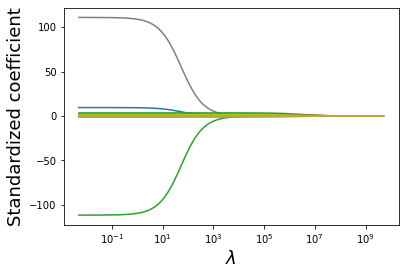

In [148]:
# Visualize shrinking regression coefficients with lambda increase
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')

In [149]:
# Cross validation to find optimal lambda
alphas = 10**np.linspace(5,-2,200)*0.5
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(Xstd, y)

#Optimal value of the tuning parameter - lambda
ridgecv.alpha_

0.05678666791715526

Text(0, 0.5, 'Cross-validation error')

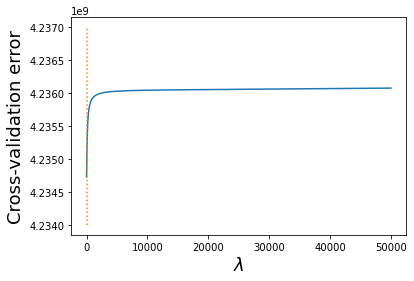

In [167]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(ridgecv.alphas,ridgecv.cv_values_.sum(axis=0))
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[4e9+2e8+3e7+4e6,4e9+2e8+3e7+7e6],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

Text(0, 0.5, 'Standardized coefficient')

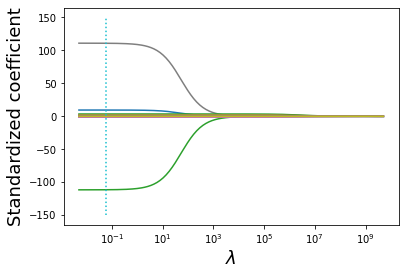

In [151]:
# Visualize with the optimal lambda
alphas = 10**np.linspace(10,-2,200)*0.5
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[-150,150],':')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')

In [152]:
Xtest_std = scaler.transform(X_test)

In [153]:
#Using the developed ridge regression model to predict on test data
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(Xstd, y)
pred=ridge.predict(Xtest_std)

In [154]:
#RMSE on test data
np.sqrt(((pred-y_test)**2).mean())

37.11052273216127

Numerical + Categorical Ridge RMSE = 37.111

In [155]:
y_test.std()

37.54673725524366

In [156]:
#Checking the coefficients of the ridge regression model
#ridge.coef_

In [157]:
#R-squared on train data for the ridge regression model
r2_score(ridge.predict(Xstd),y)

-41.22659747836519

In [158]:
#R-squared on test data for the ridge regression model
r2_score(pred,y_test)

-40.56369481199305

In [159]:
toc_dummy = time.time()
toc_dummy - tic_dummy

12143.176284074783